link for program : https://towardsdatascience.com/understanding-anomaly-detection-in-python-using-gaussian-mixture-model-e26e5d06094b

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

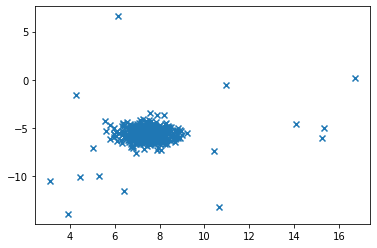

In [14]:
X, y_true = make_blobs(n_samples=500, centers=1, cluster_std=0.60, random_state=5)
X_append, y_true_append = make_blobs(n_samples=20,centers=1, cluster_std=5,random_state=5)
X = np.vstack([X,X_append])
y_true = np.hstack([y_true, [1 for _ in y_true_append]])
X = X[:, ::-1]
plt.scatter(X[:,0], X[:,1], marker="x")

In [29]:
def estimateGaussian(X):
    m = X.shape[0]
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    mu = (sum_/m)
    sigma = np.cov(X.T)
    return mu,sigma

estimateGaussian(X)

(array([ 7.47238448, -5.56412287]),
 array([[1.01876685, 0.20283814],
        [0.20283814, 1.22281865]]))

In [33]:
def multivariateGaussian(X, mu, sigma):
    k = len(mu)
    sigma = np.cov(X.T)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p
mu, sigma = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma)
p

array([1.26287284e-01, 8.91255775e-02, 1.41971143e-01, 1.23775192e-01,
       1.06587277e-01, 1.21992431e-01, 1.13455851e-01, 9.20745020e-02,
       1.07523840e-01, 1.15281365e-01, 1.15432542e-01, 1.44599489e-01,
       1.43731967e-01, 5.40885043e-02, 4.73636875e-02, 1.32498806e-01,
       1.10548871e-01, 1.07953768e-01, 1.07341192e-01, 1.24618430e-01,
       5.81629123e-02, 1.26885184e-01, 1.17257943e-01, 1.04682938e-01,
       8.06654831e-02, 1.24530427e-01, 1.33345401e-01, 1.12612602e-01,
       1.23774409e-01, 1.36099039e-01, 6.81466283e-02, 6.31757005e-02,
       1.05081821e-01, 1.28678006e-01, 4.41503268e-02, 4.84478912e-02,
       1.35760410e-01, 1.31576576e-01, 9.97509853e-02, 1.04957065e-01,
       1.17058943e-01, 1.32441697e-01, 1.17279996e-01, 1.29026985e-01,
       9.20569953e-02, 6.94521601e-02, 1.21720022e-01, 1.40817305e-01,
       7.13500450e-02, 1.25796369e-01, 6.61629684e-02, 1.00622594e-01,
       1.29493549e-01, 1.42680732e-01, 1.31096450e-01, 8.58591625e-02,
      

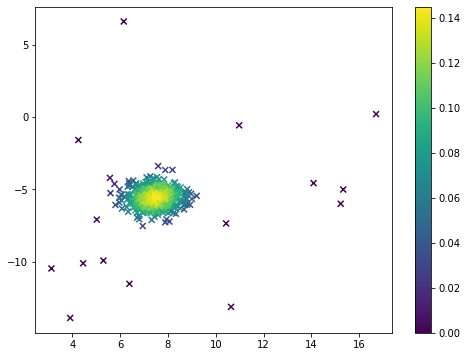

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
plt.colorbar();

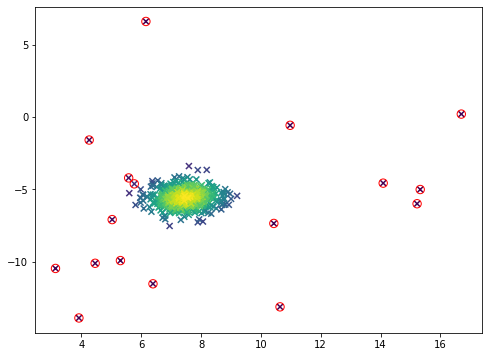

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
# Circling of anomalies
epsilon = 0.02
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);